In this notebook, I am going to do some EDA and visualization on vaccine dataset.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
vaccine=pd.read_csv('../clean_data/vaccine_population.csv')

In [3]:
vaccine.shape

(52, 11)

In [4]:
#normalize the total first dose allocation, use it devided by total population per state

vaccine['al_over_po']=vaccine['total_first_allocation']/vaccine['2019_population']

In [5]:
vaccine.head()

,jurisdiction,2019_population,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,doses_allocated_01_25,total_first_allocation,al_over_po
0,Alabama,4903185,Region 4,40950,113550,67125,58250,58350,60825,60825,459875,0.093791
1,Alaska,731545,Region 10,35100,26800,0,52900,0,0,0,114800,0.156928
2,Arizona,7278717,Region 9,58500,161325,94925,83025,83225,86300,86300,653600,0.089796
3,Arkansas,3017804,Region 6,25350,69625,41100,36125,36225,37125,37125,282675,0.093669
4,California,39512223,Region 9,327600,905625,529675,463450,465325,485800,485800,3663275,0.092712


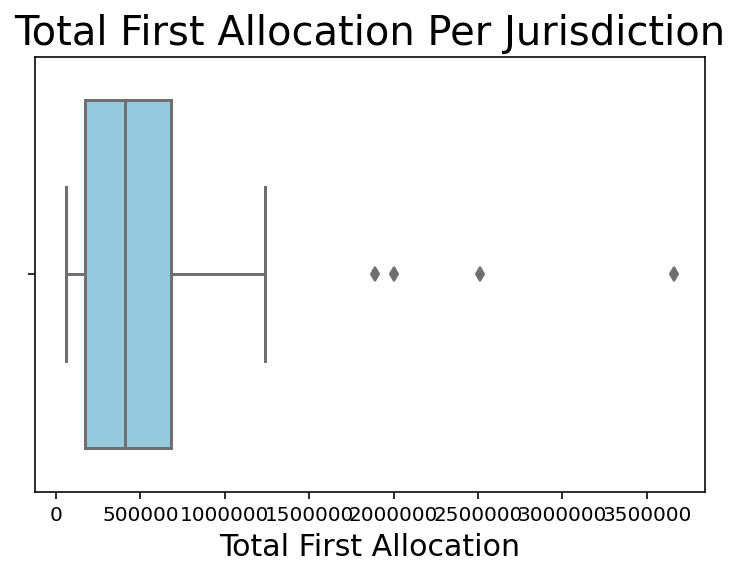

In [6]:
sns.boxplot(x=vaccine['total_first_allocation'],color='skyblue')
plt.ticklabel_format(style='plain',axis='x')
plt.title('Total First Allocation Per Jurisdiction', size=20)
plt.xlabel('Total First Allocation',size=15);

# there are 4 jurisdictions has way more allocations than other jurisdiction

In [7]:
vaccine.sort_values(by=['total_first_allocation'], ascending=False)[:4]

# California has the most allocation, then it's Texas, Florida and New York

,jurisdiction,2019_population,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,doses_allocated_01_25,total_first_allocation,al_over_po
4,California,39512223,Region 9,327600,905625,529675,463450,465325,485800,485800,3663275,0.092712
43,Texas,28995881,Region 6,224250,620400,362875,317425,319000,332850,332850,2509650,0.086552
9,Florida,21477737,Region 4,179400,495625,289925,253350,254825,266100,266100,2005325,0.093368
32,New York,19453561,Region 2,169650,466125,273650,239025,239525,250400,250400,1888775,0.097091


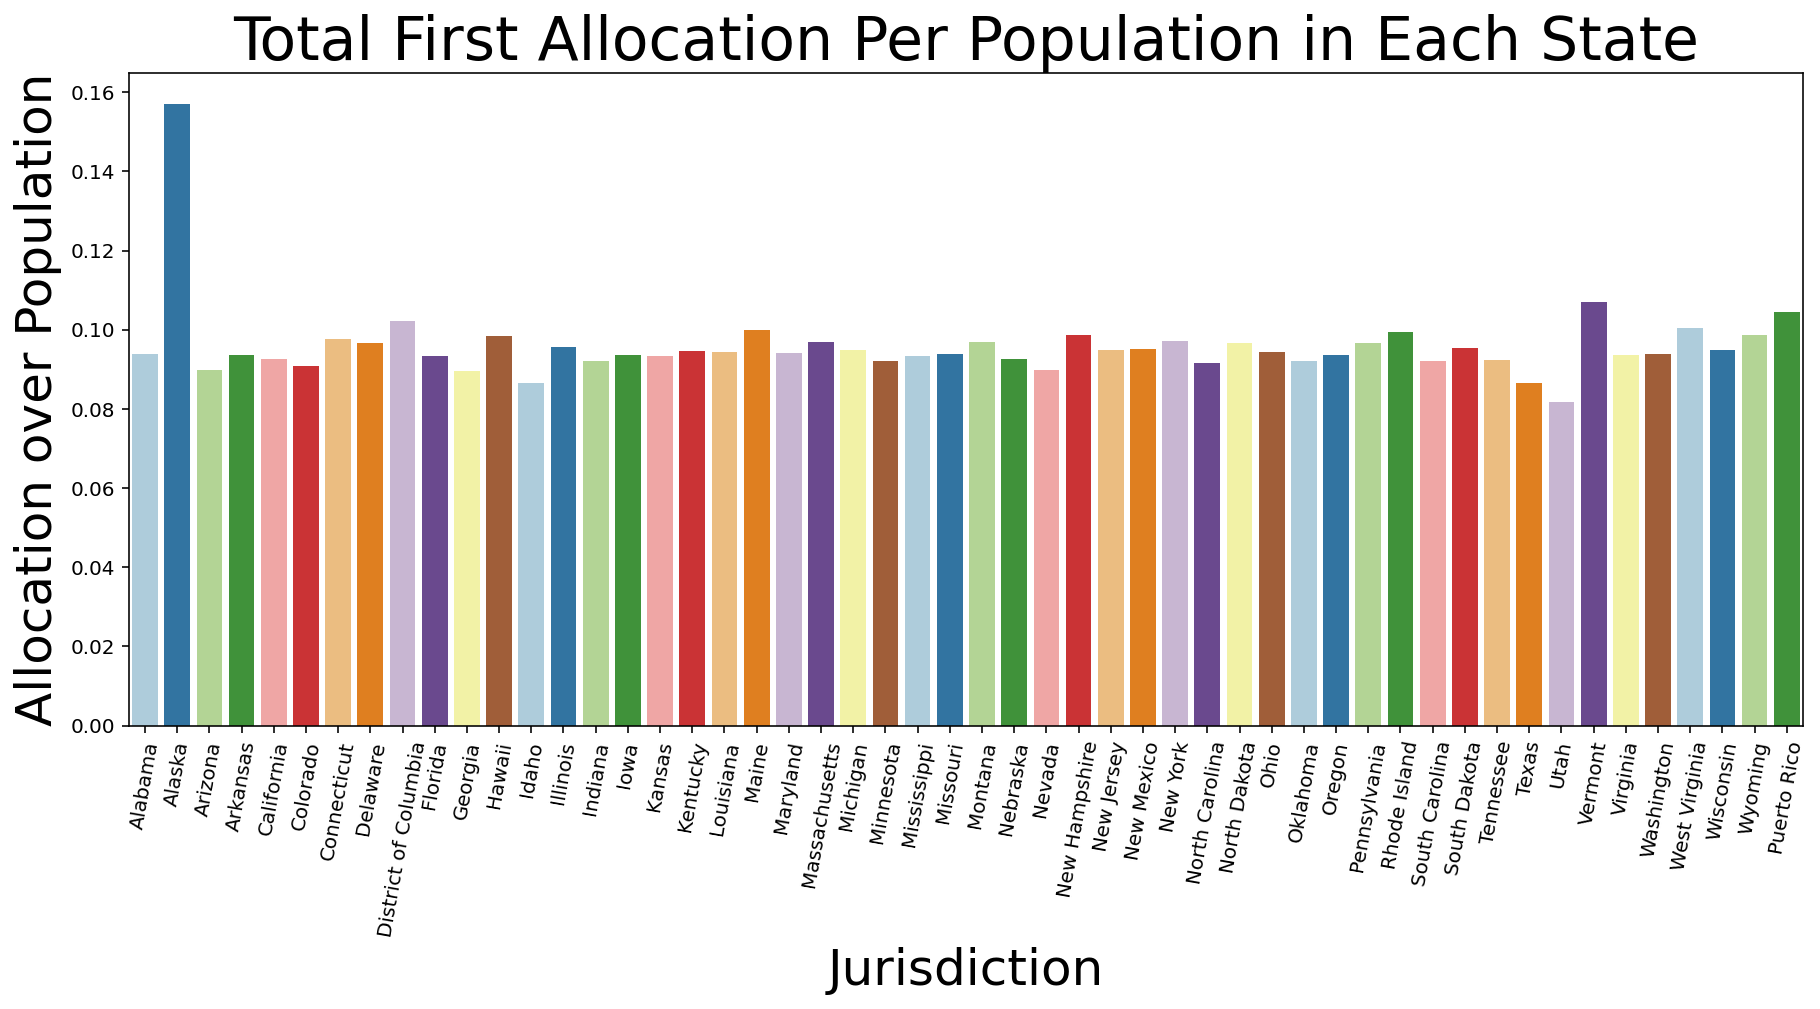

In [8]:
plt.figure(figsize=(15,6))
sns.barplot(data=vaccine,
            y=vaccine['al_over_po'],x=vaccine['jurisdiction'],
            palette='Paired')#,order=vaccine_sort.jurisdiction)
#plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Jurisdiction",size=25)
plt.ylabel("Allocation over Population",size=25)
plt.title('Total First Allocation Per Population in Each State',size=30)

plt.xticks(rotation=80);

#total first allocation per population in each state with alphabet oder

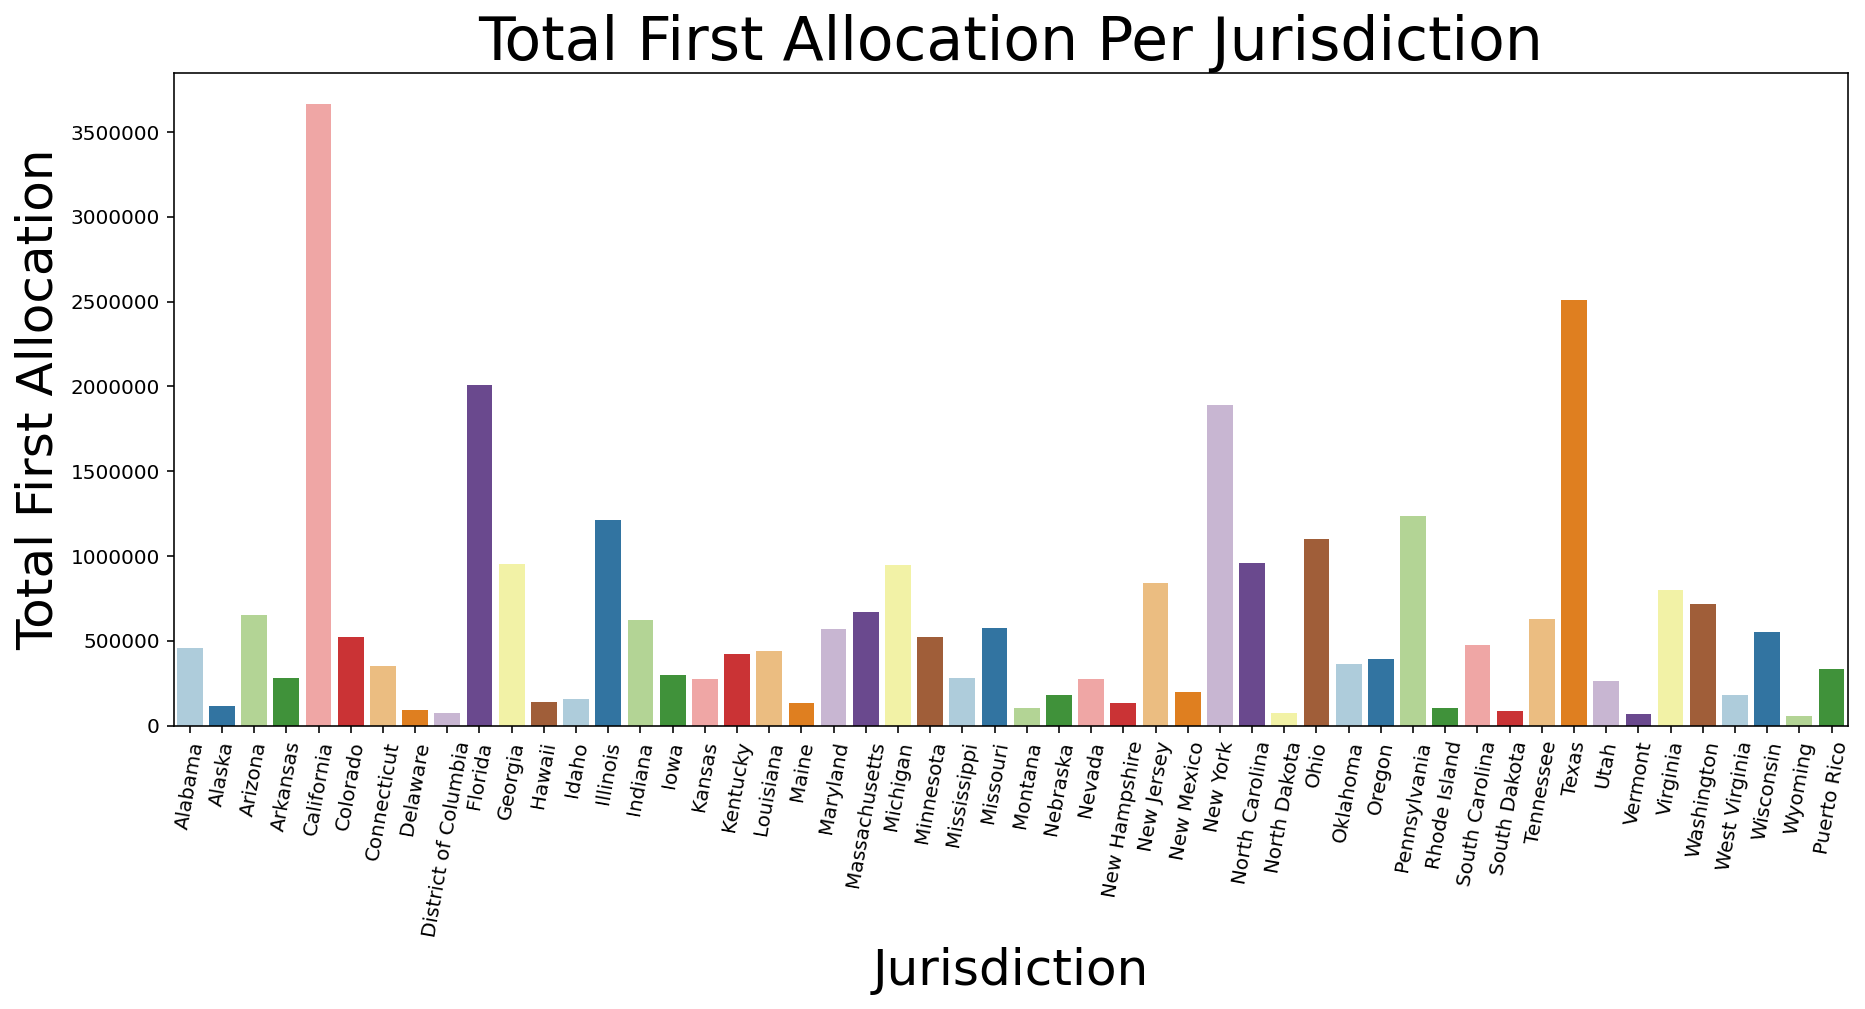

In [9]:
plt.figure(figsize=(15,6))
sns.barplot(data=vaccine,y=vaccine['total_first_allocation'],x=vaccine['jurisdiction'],
            palette='Paired')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Jurisdiction",size=25)
plt.ylabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30)

plt.xticks(rotation=80);

# Total first allocation per jurisdiction with alphabet order

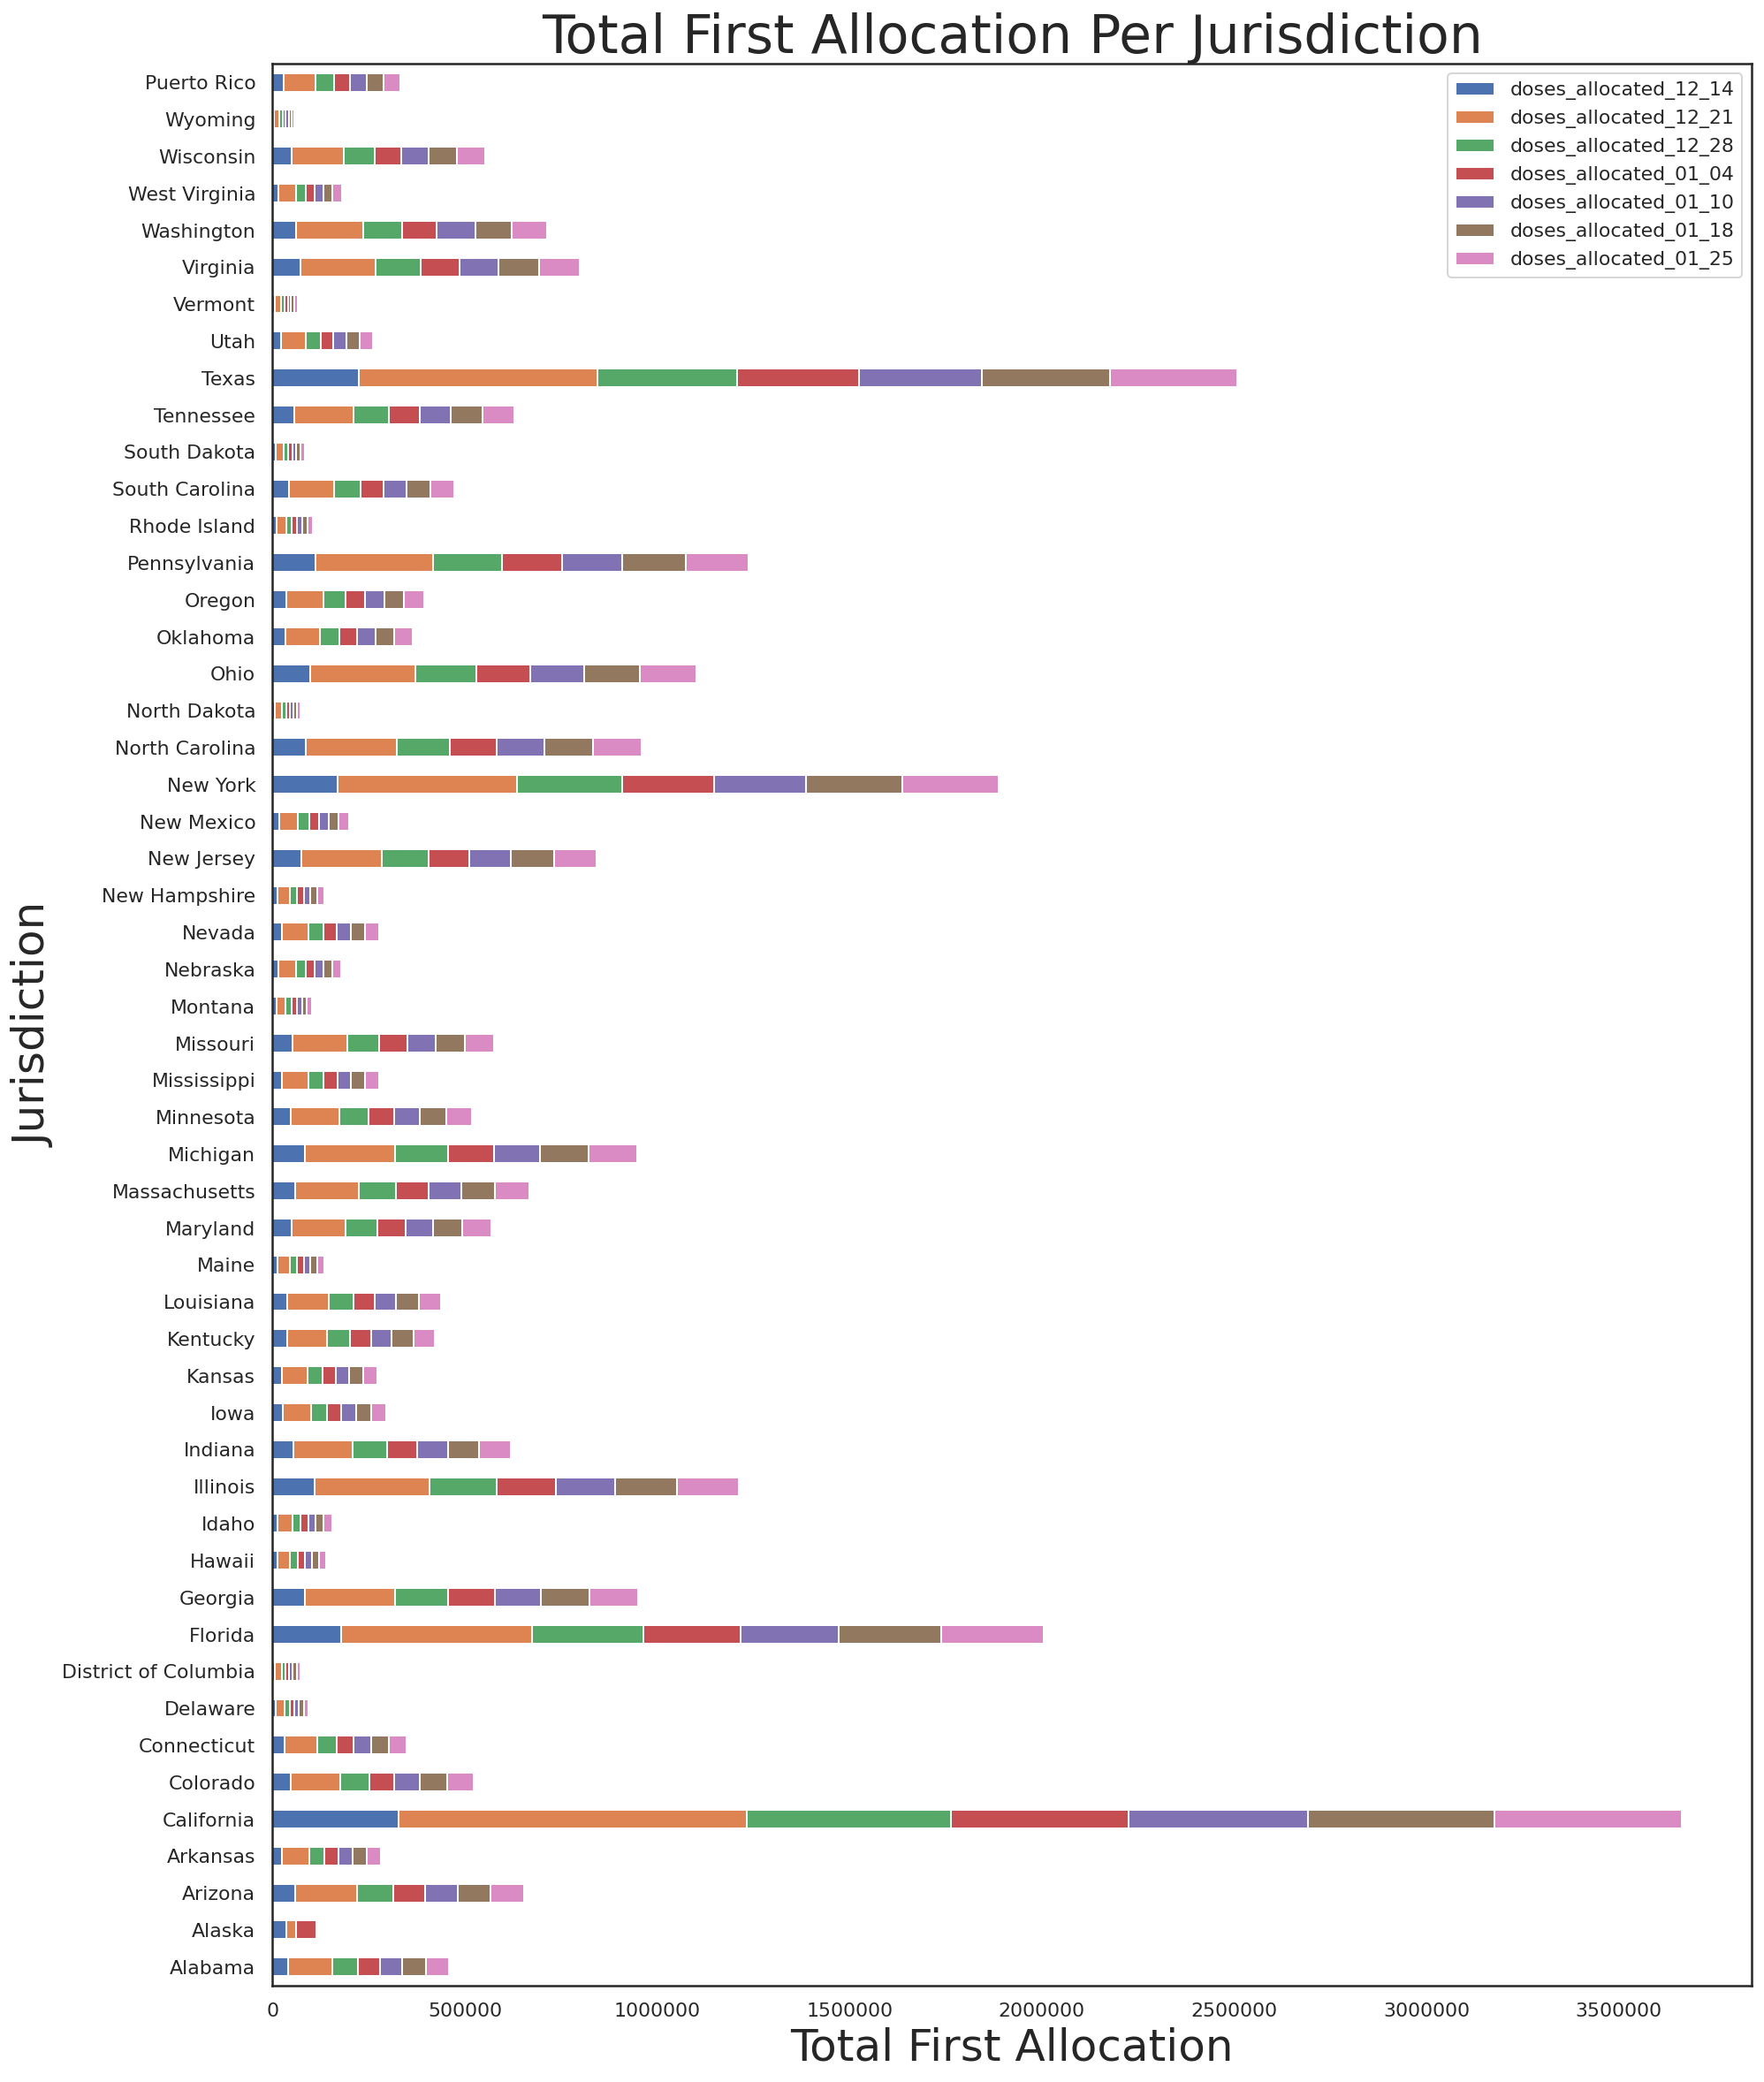

In [10]:
sns.set(style='white')

ax=vaccine.drop(['total_first_allocation','2019_population','al_over_po'],axis=1).\
plot.barh(stacked=True,figsize=(15,20))

plt.ticklabel_format(style='plain',axis='x')
ax.set_yticklabels(vaccine.jurisdiction)
plt.ylabel("Jurisdiction",size=25)
plt.xlabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30);

#total first allocation per jurisdiction on a stacked bar chart, with alphabet order

## Plot some graphies in the oder of total allocations

In [11]:
vaccine_sort=vaccine.sort_values(by=['total_first_allocation'], 
                                 ascending=False).drop(columns=['2019_population'])
vaccine_sort.head()

,jurisdiction,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,doses_allocated_01_25,total_first_allocation,al_over_po
4,California,Region 9,327600,905625,529675,463450,465325,485800,485800,3663275,0.092712
43,Texas,Region 6,224250,620400,362875,317425,319000,332850,332850,2509650,0.086552
9,Florida,Region 4,179400,495625,289925,253350,254825,266100,266100,2005325,0.093368
32,New York,Region 2,169650,466125,273650,239025,239525,250400,250400,1888775,0.097091
38,Pennsylvania,Region 3,111150,305375,179600,156875,157175,164000,164000,1238175,0.096717


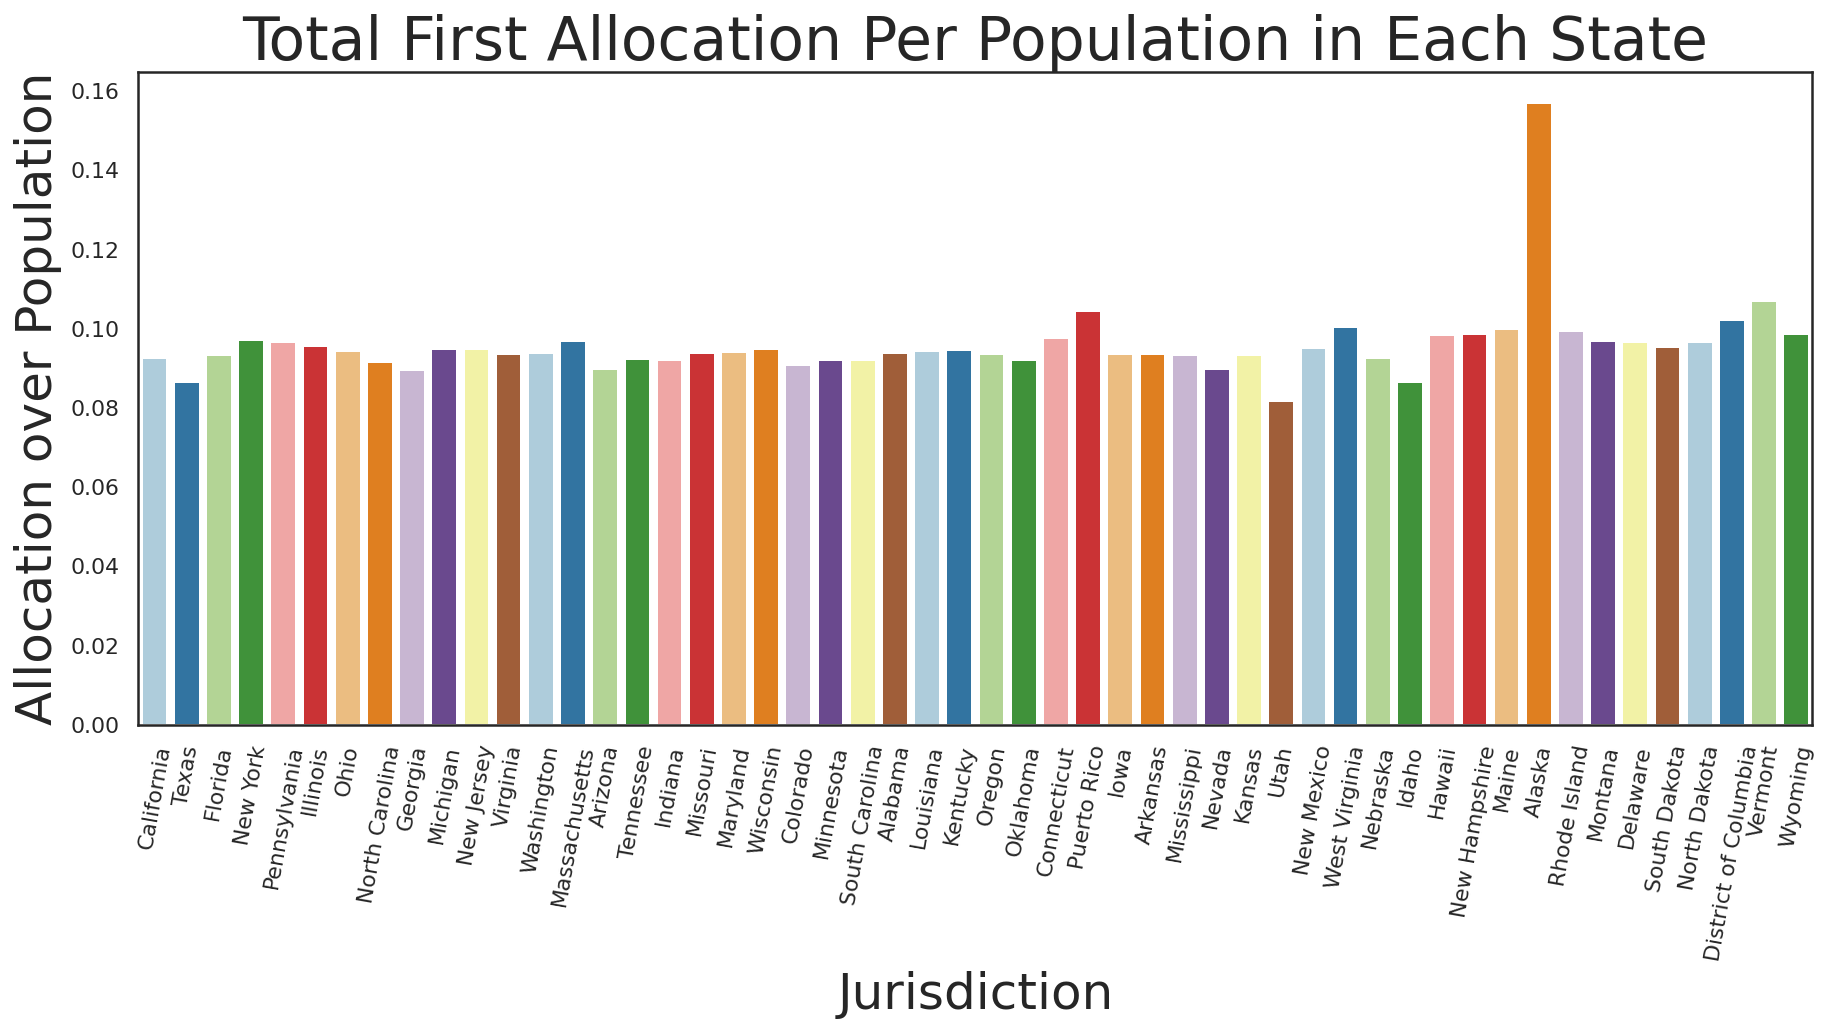

In [13]:
plt.figure(figsize=(15,6))
sns.barplot(data=vaccine_sort,
            y=vaccine_sort['al_over_po'],x=vaccine_sort['jurisdiction'],
            palette='Paired')#,order=vaccine_sort.jurisdiction)
#plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Jurisdiction",size=25)
plt.ylabel("Allocation over Population",size=25)
plt.title('Total First Allocation Per Population in Each State',size=30)

plt.xticks(rotation=80);
plt.savefig('../images/total_allocation_per_population_state.png')
#total first dose allocation per population with the total allocation in descending order

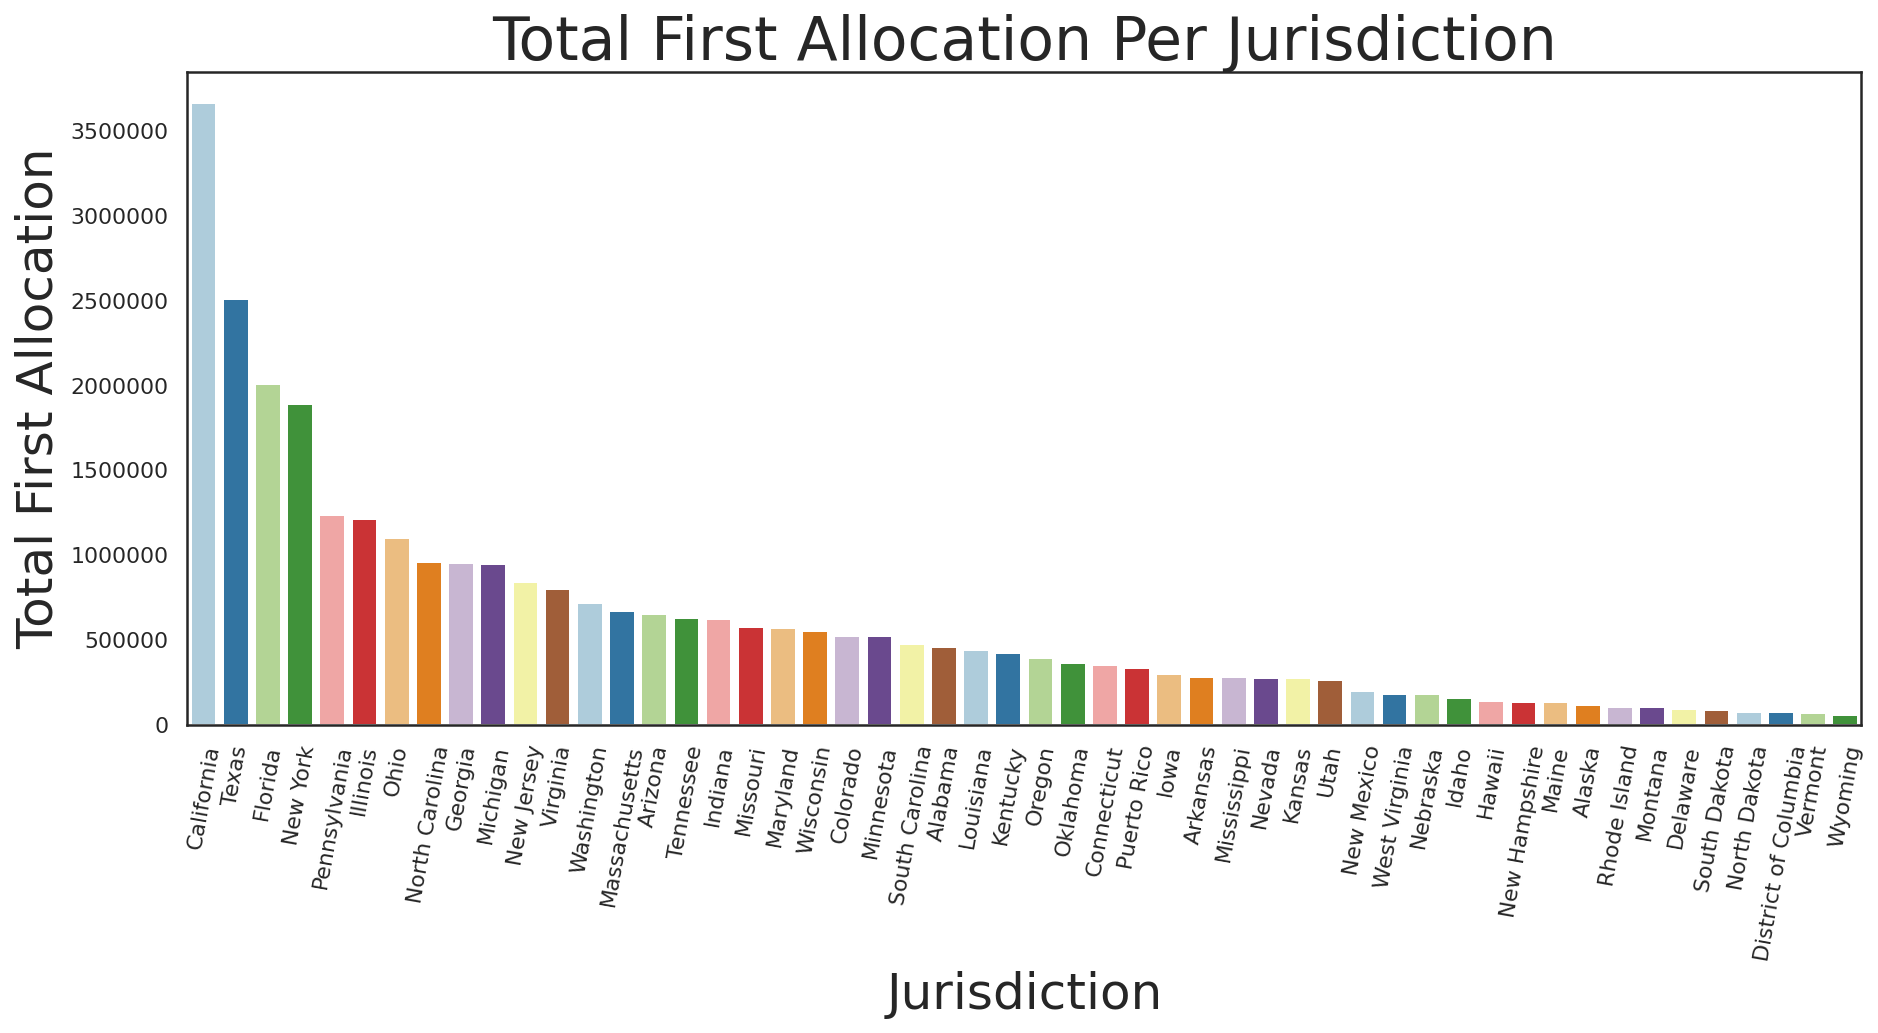

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(data=vaccine_sort.drop('al_over_po',axis=1),
            y=vaccine_sort['total_first_allocation'],x=vaccine_sort['jurisdiction'],
            palette='Paired')#,order=vaccine_sort.jurisdiction)
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Jurisdiction",size=25)
plt.ylabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30)

plt.xticks(rotation=80);

#total first allocation per jurisdiction with the total allocation in descending order

In [15]:
vaccine_sort_10=vaccine_sort[:10].reset_index(drop=True)
vaccine_sort_10.head()

,jurisdiction,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,doses_allocated_01_25,total_first_allocation,al_over_po
0,California,Region 9,327600,905625,529675,463450,465325,485800,485800,3663275,0.092712
1,Texas,Region 6,224250,620400,362875,317425,319000,332850,332850,2509650,0.086552
2,Florida,Region 4,179400,495625,289925,253350,254825,266100,266100,2005325,0.093368
3,New York,Region 2,169650,466125,273650,239025,239525,250400,250400,1888775,0.097091
4,Pennsylvania,Region 3,111150,305375,179600,156875,157175,164000,164000,1238175,0.096717


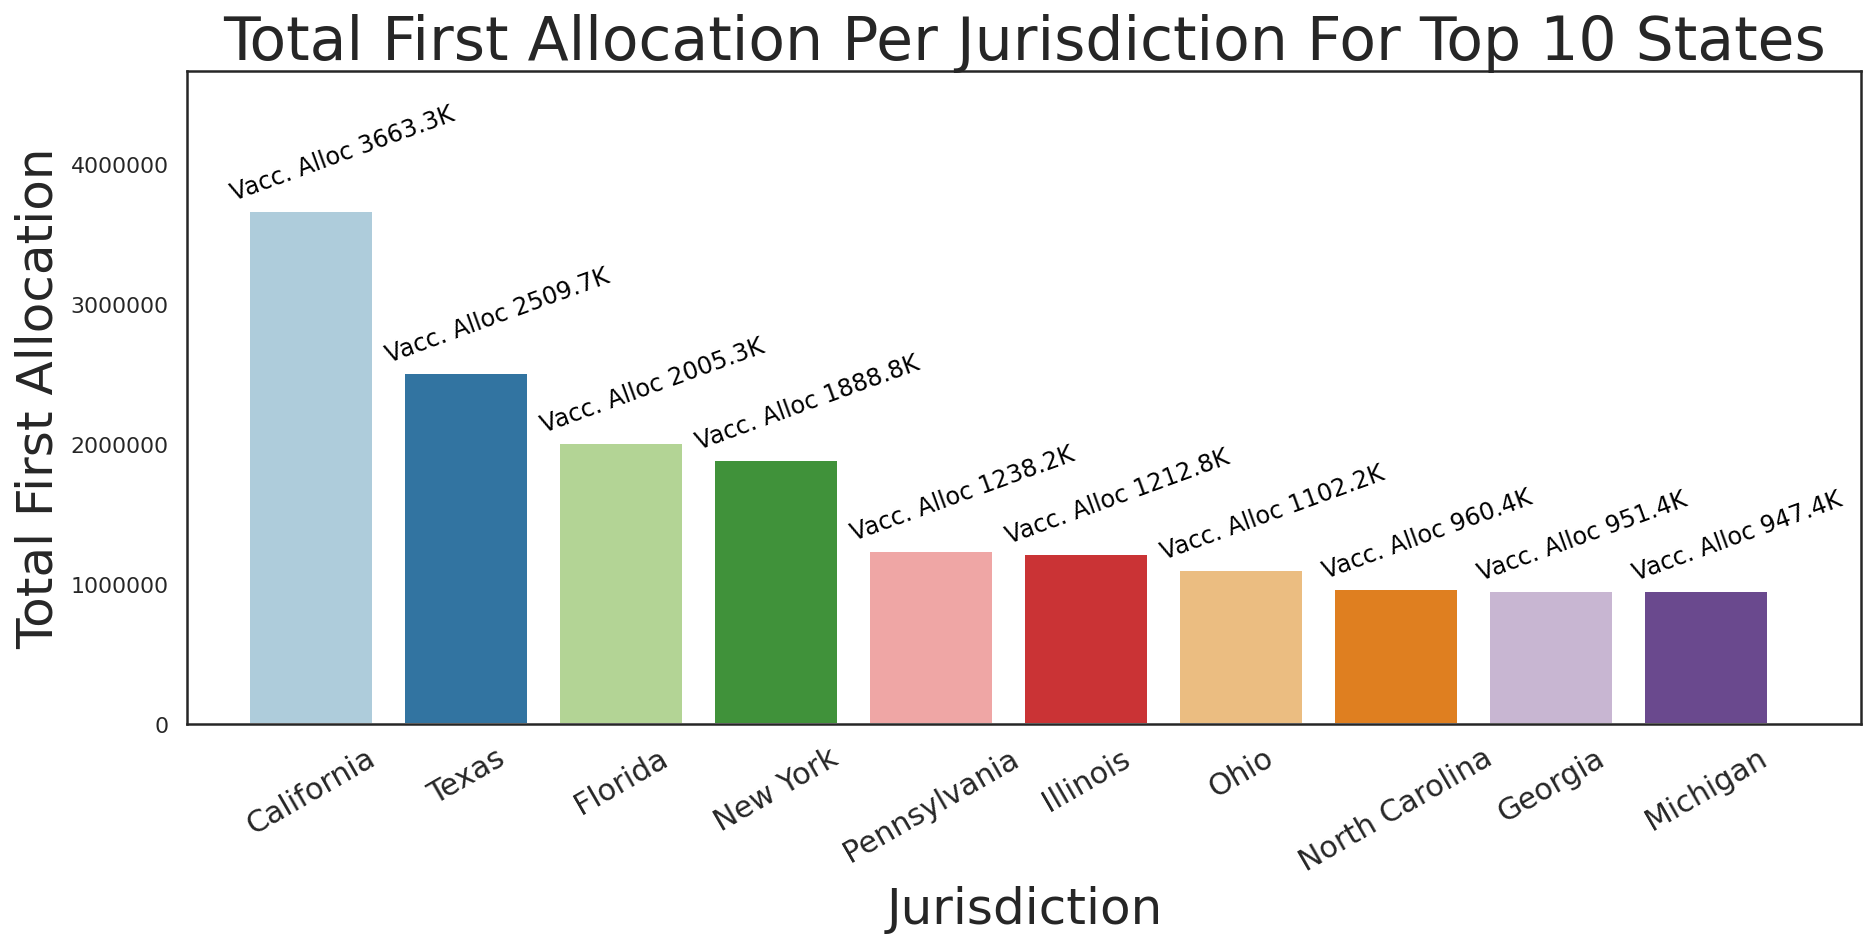

In [16]:
plt.figure(figsize=(15,6))

g=sns.barplot(data=vaccine_sort_10,y=vaccine_sort_10['total_first_allocation'],
              x=vaccine_sort_10['jurisdiction'],palette='Paired')

plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Jurisdiction",size=25)
plt.ylabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction For Top 10 States',size=30)
plt.ylim([0,4663275])
plt.xlim([-0.8,10])
plt.xticks(rotation=30,size=15)

#n=-1
for index, row in vaccine_sort_10.iterrows():
    #n+=1
    g.text(row.name+0.2,row.total_first_allocation+80000,
           'Vacc. Alloc'' ''{0:.1f}K'.format(row.total_first_allocation/1000),
           color='black',ha='center',rotation=20)

    

In [17]:
vaccine_sort_no_total=vaccine.sort_values(by=['total_first_allocation'], \
                                          ascending=True).drop(['total_first_allocation','2019_population','al_over_po'],axis=1)
vaccine_sort_no_total=vaccine_sort_no_total.set_index('jurisdiction')

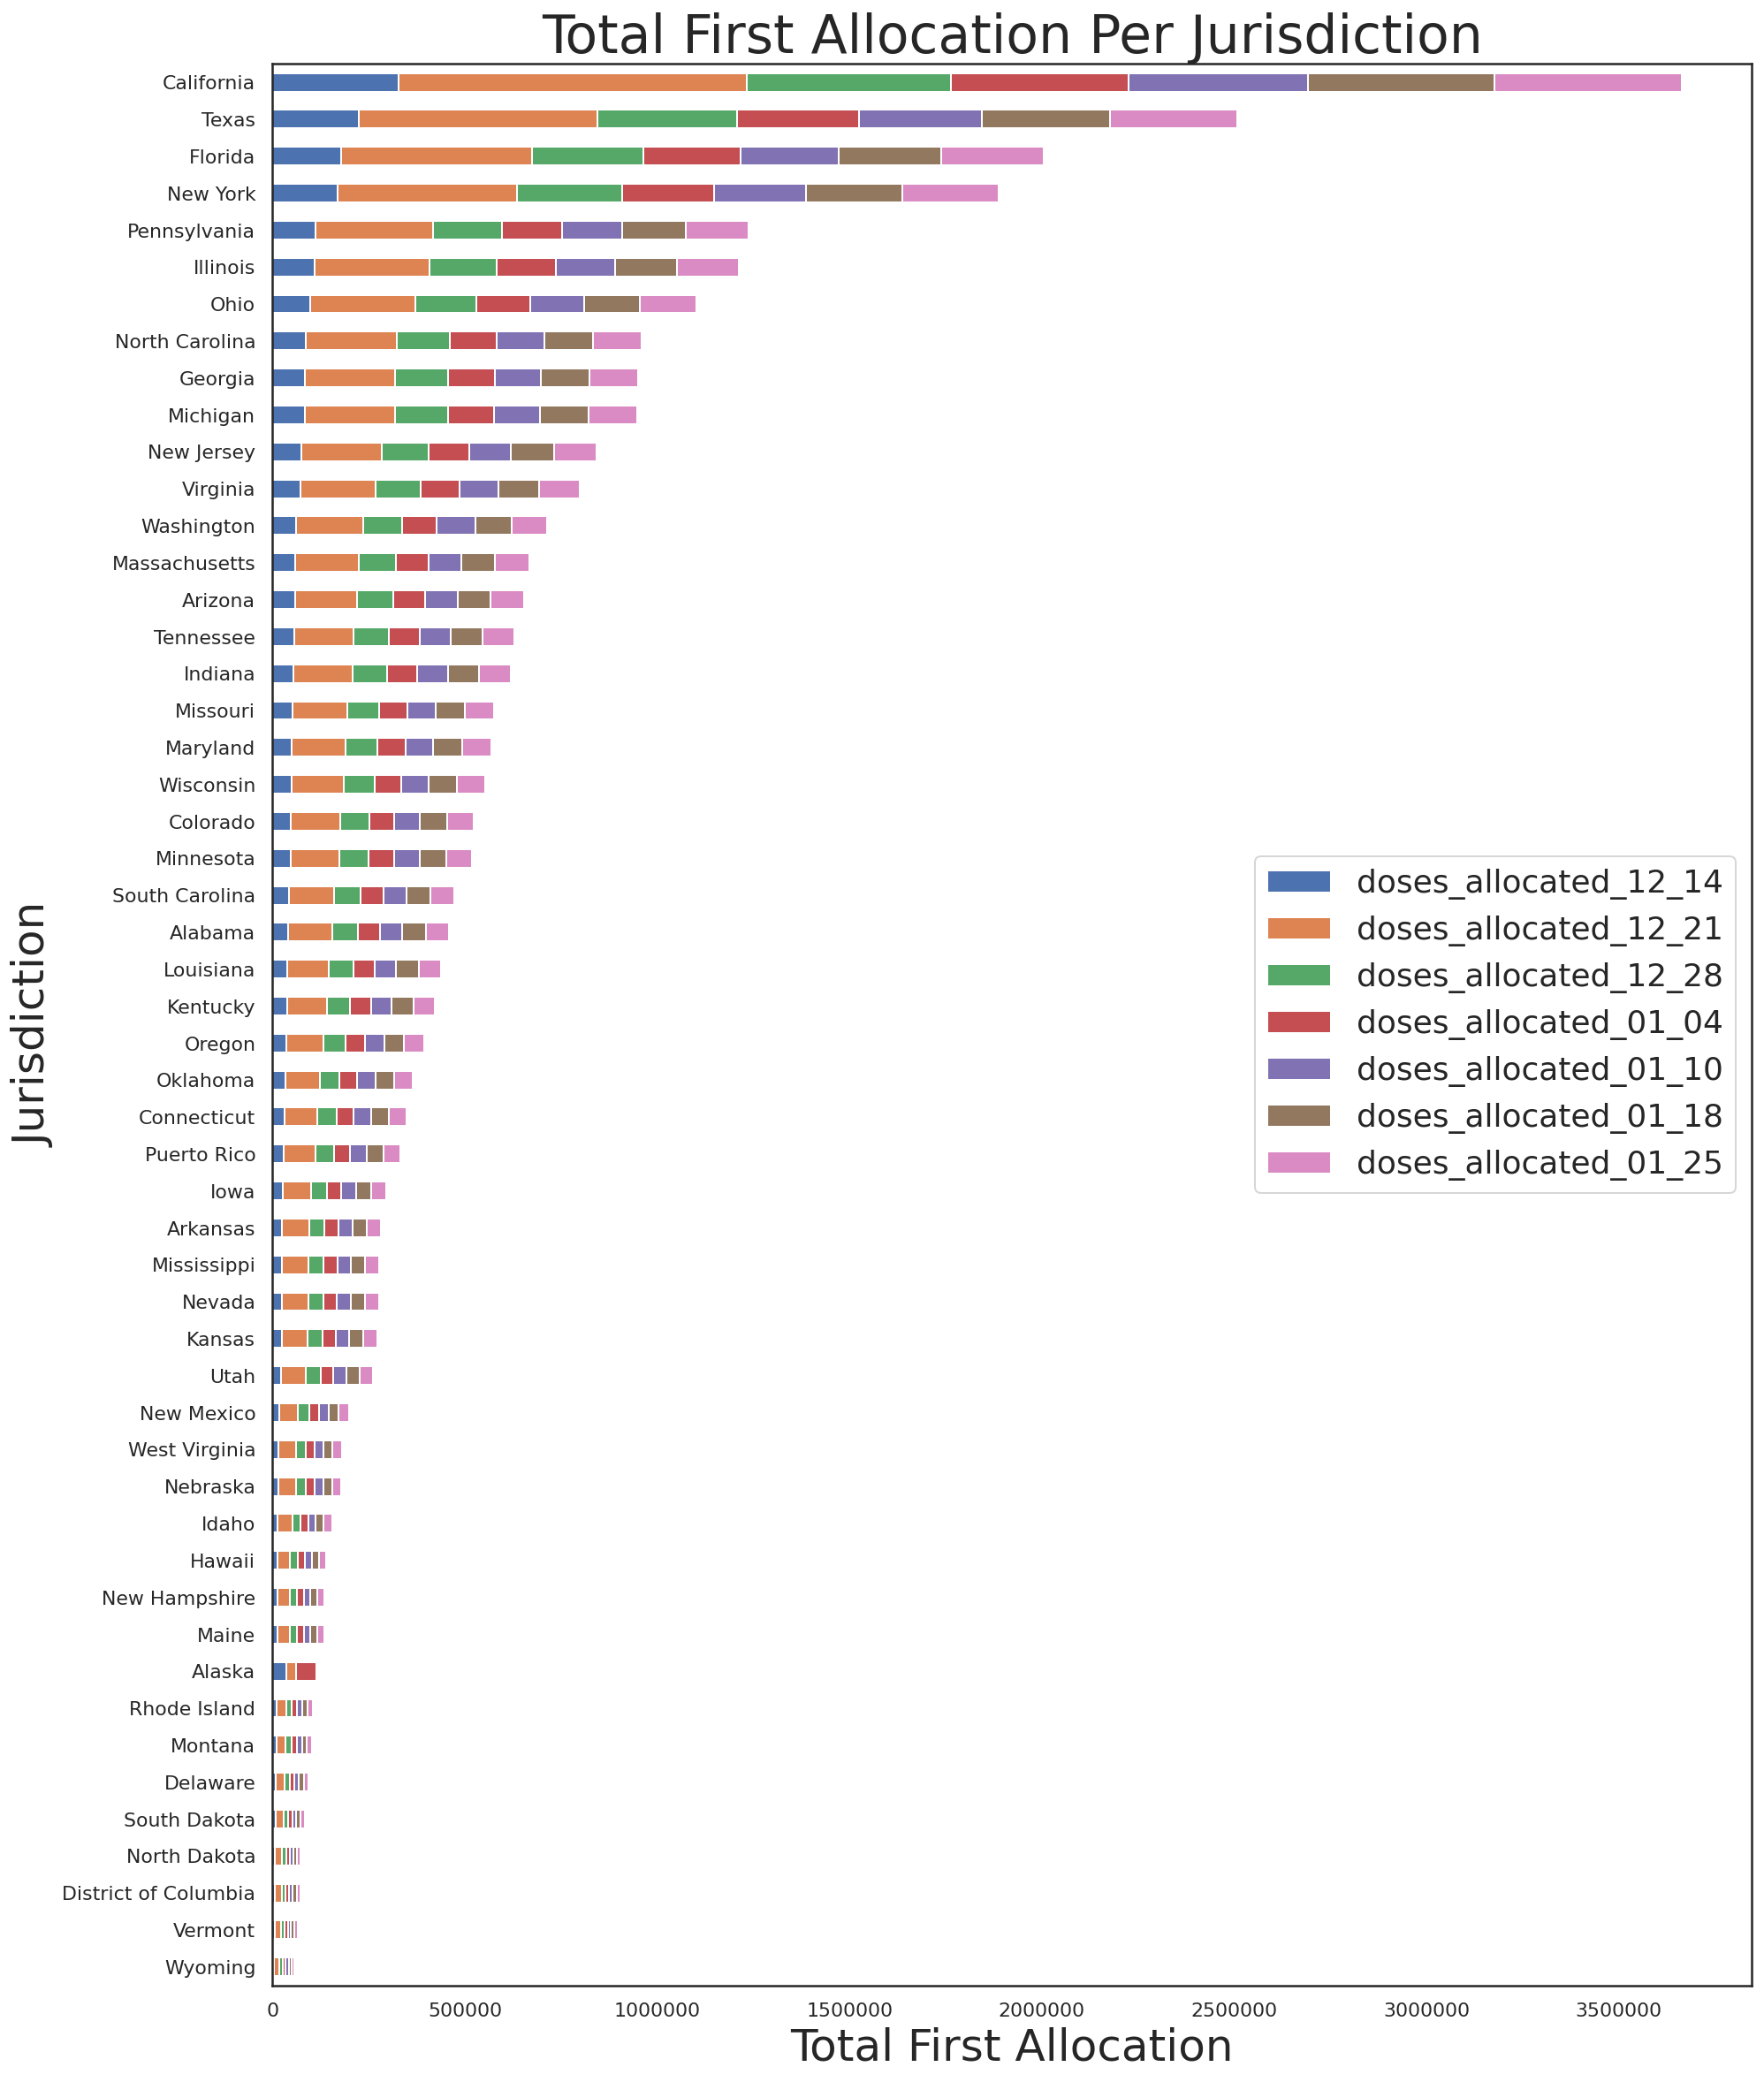

In [18]:
sns.set(style='white')
ax=vaccine_sort_no_total.plot(kind='barh',stacked=True,figsize=(15,20))
plt.ticklabel_format(style='plain',axis='x')
ax.set_yticklabels(vaccine_sort_no_total.index)
plt.ylabel("Jurisdiction",size=25)
plt.xlabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction',size=30)
plt.legend(fontsize=18,loc='center right');

#total first allocation per jurisdiction with total allocation in descending order

# add population into graphies

In [19]:
vaccine.tail()

,jurisdiction,2019_population,hhs_region,doses_allocated_12_14,doses_allocated_12_21,doses_allocated_12_28,doses_allocated_01_04,doses_allocated_01_10,doses_allocated_01_18,doses_allocated_01_25,total_first_allocation,al_over_po
47,Washington,7614893,Region 10,62400,172850,101825,88950,101825,93300,93300,714450,0.093823
48,West Virginia,1792147,Region 3,16575,44300,25925,22900,23000,23600,23600,179900,0.100382
49,Wisconsin,5822434,Region 5,49725,136100,79750,69800,70000,73750,73750,552875,0.094956
50,Wyoming,578759,Region 8,4875,13900,8375,7400,7400,7600,7600,57150,0.098746
51,Puerto Rico,3193694,Region 2,30225,81850,48200,42250,42350,44325,44325,333525,0.104432


In [20]:
# make a dataframe with only the state, population and total allocation

state_pop_vac=vaccine[['jurisdiction','2019_population','total_first_allocation']].copy()
state_pop_vac.head()

,jurisdiction,2019_population,total_first_allocation
0,Alabama,4903185,459875
1,Alaska,731545,114800
2,Arizona,7278717,653600
3,Arkansas,3017804,282675
4,California,39512223,3663275


In [21]:
df = pd.melt(state_pop_vac,id_vars='jurisdiction', var_name='pop_vac',value_name='data')
df.head()

,jurisdiction,pop_vac,data
0,Alabama,2019_population,4903185
1,Alaska,2019_population,731545
2,Arizona,2019_population,7278717
3,Arkansas,2019_population,3017804
4,California,2019_population,39512223


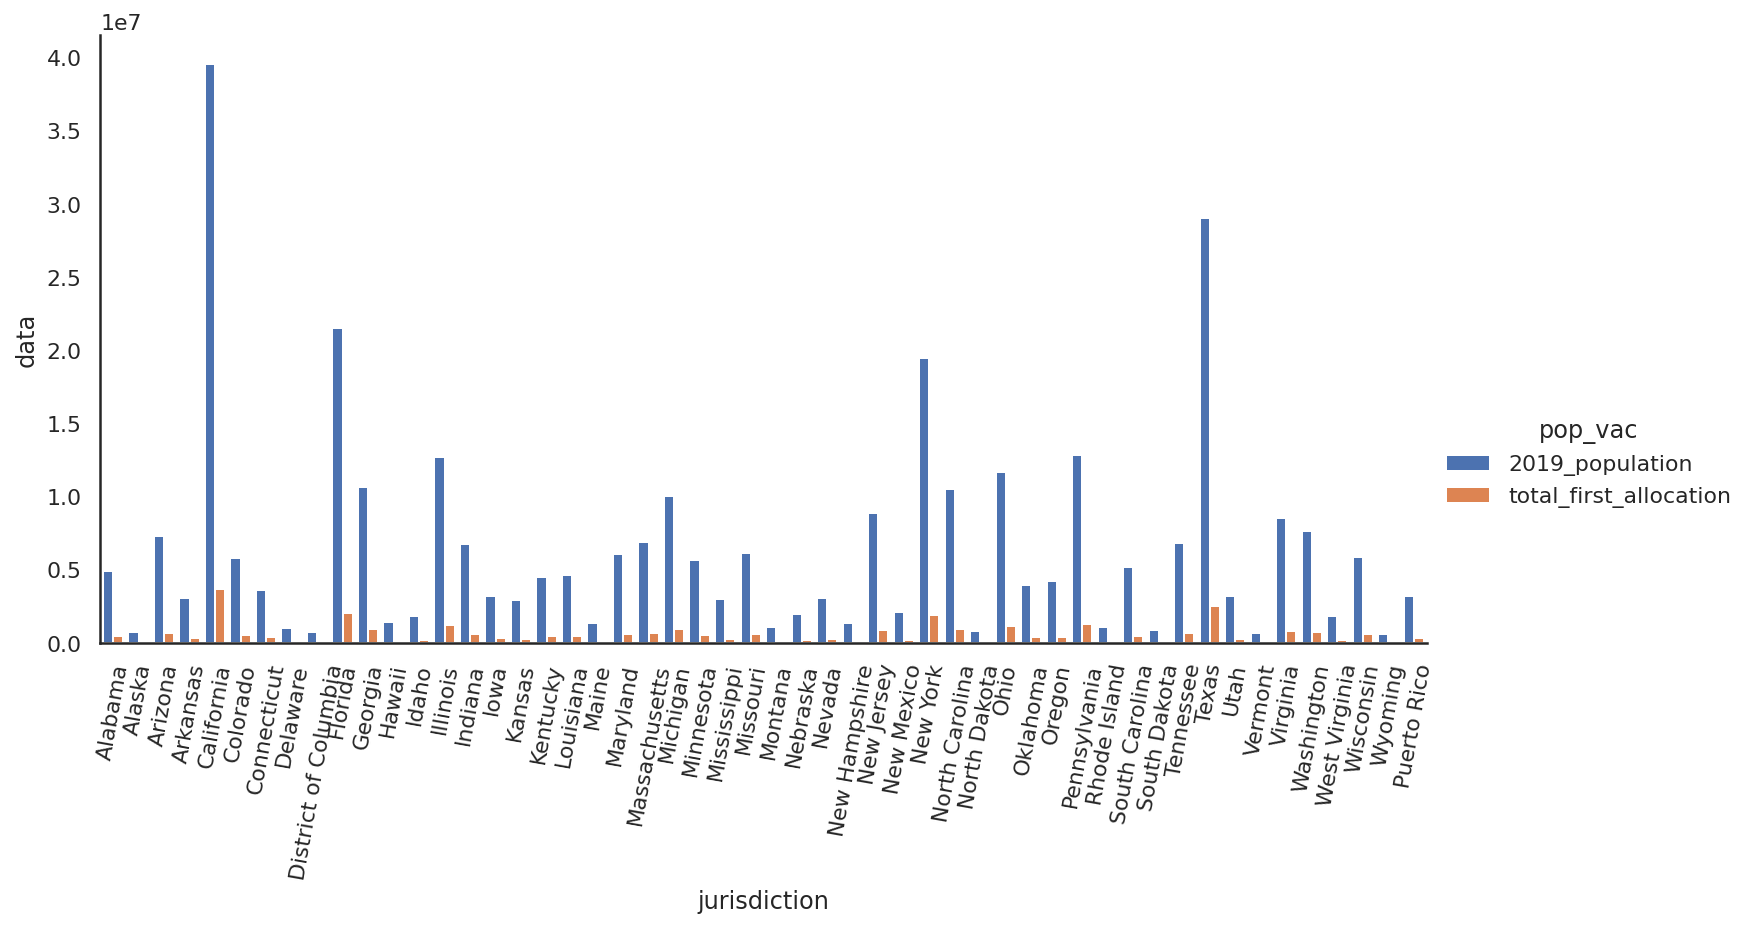

In [22]:
g = sns.catplot(x='jurisdiction',y='data',hue='pop_vac',data=df,
                saturation=1,kind='bar',ci=None,height=5, aspect=2)
plt.xticks(rotation=80);

# putting the population and alloction on the same scale is a bad idea

___

In [23]:
state_pop_vac_sort=state_pop_vac.sort_values(by=['total_first_allocation'],ascending=False)
state_pop_vac_sort.head()

,jurisdiction,2019_population,total_first_allocation
4,California,39512223,3663275
43,Texas,28995881,2509650
9,Florida,21477737,2005325
32,New York,19453561,1888775
38,Pennsylvania,12801989,1238175


In [24]:
state_pop_vac_sort.jurisdiction.count()

52

In [25]:
#convert to tuple
population=tuple(list(state_pop_vac_sort['2019_population']))

In [26]:
# convert to tuple
allocation=tuple(list(state_pop_vac_sort['total_first_allocation']))

In [27]:
# convert to tuple
jurisdiction=tuple(list(state_pop_vac_sort['jurisdiction']))

**Top 10 states with the most population, and value on top of each bar are the total vaccine allocation**

No handles with labels found to put in legend.


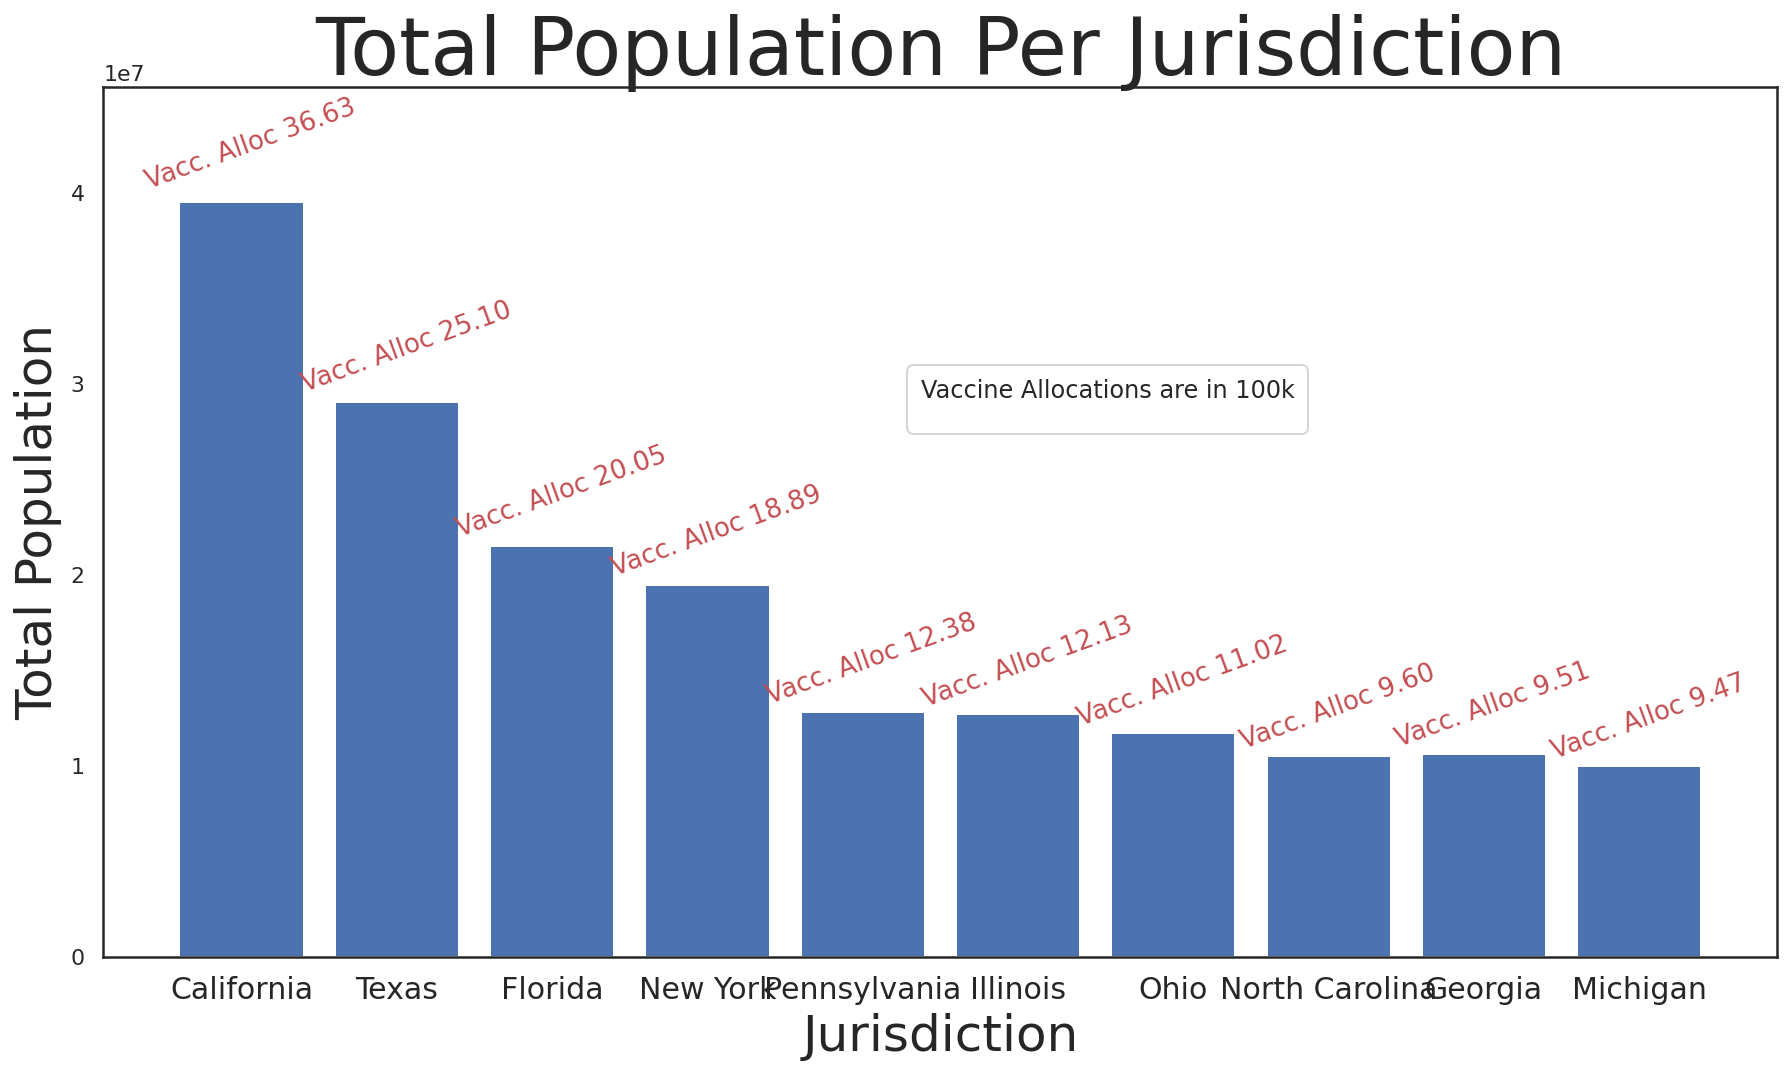

In [28]:
#https://matplotlib.org/examples/api/barchart_demo.html

#N=state_pop_vac_sort.jurisdiction.count()
N=10
population=tuple(list(state_pop_vac_sort['2019_population'].head(10)))
allocation=tuple(list(state_pop_vac_sort['total_first_allocation'].head(10)))
jurisdiction=tuple(list(state_pop_vac_sort['jurisdiction'].head(10)))

ind=np.arange(N)
width=0.8

fig,ax=plt.subplots(figsize=(15,8))
rects1=ax.bar(ind,population,width)#,color='#87CEFA')

ax.set_ylabel('Total Population',size=25)
ax.set_title('Total Population Per Jurisdiction',size=40)
ax.set_xlabel('Jurisdiction',size=25)
ax.set_xticks(ind)#+width/2)
ax.set_xticklabels(jurisdiction)

plt.xticks(size=15)
plt.ylim([0, 45512223])
plt.legend(fontsize='x-large',loc='upper center',title='Vaccine Allocations are in 100k',
          bbox_to_anchor=(0.6, 0.7))
# plt.ticklabel_format(style='plain',axis='y')

# attach a text label above each bar displaying each state's vaccine allocation
def autolabel(rects):
    n=-1
    for rect in rects:
        n+=1
        pop=rect.get_height() #getting the height of the text
        ax.text(rect.get_x()+rect.get_width()/2.+0.06,1.01*pop,
                'Vacc. Alloc'' ''%.2f'%(allocation[n]/100_000),
                ha='center',va='bottom',color='r',fontsize=13,rotation=20)
        
autolabel(rects1)

plt.show()

---

**Total Population per state with the bar text been the vaccine allocation per state**

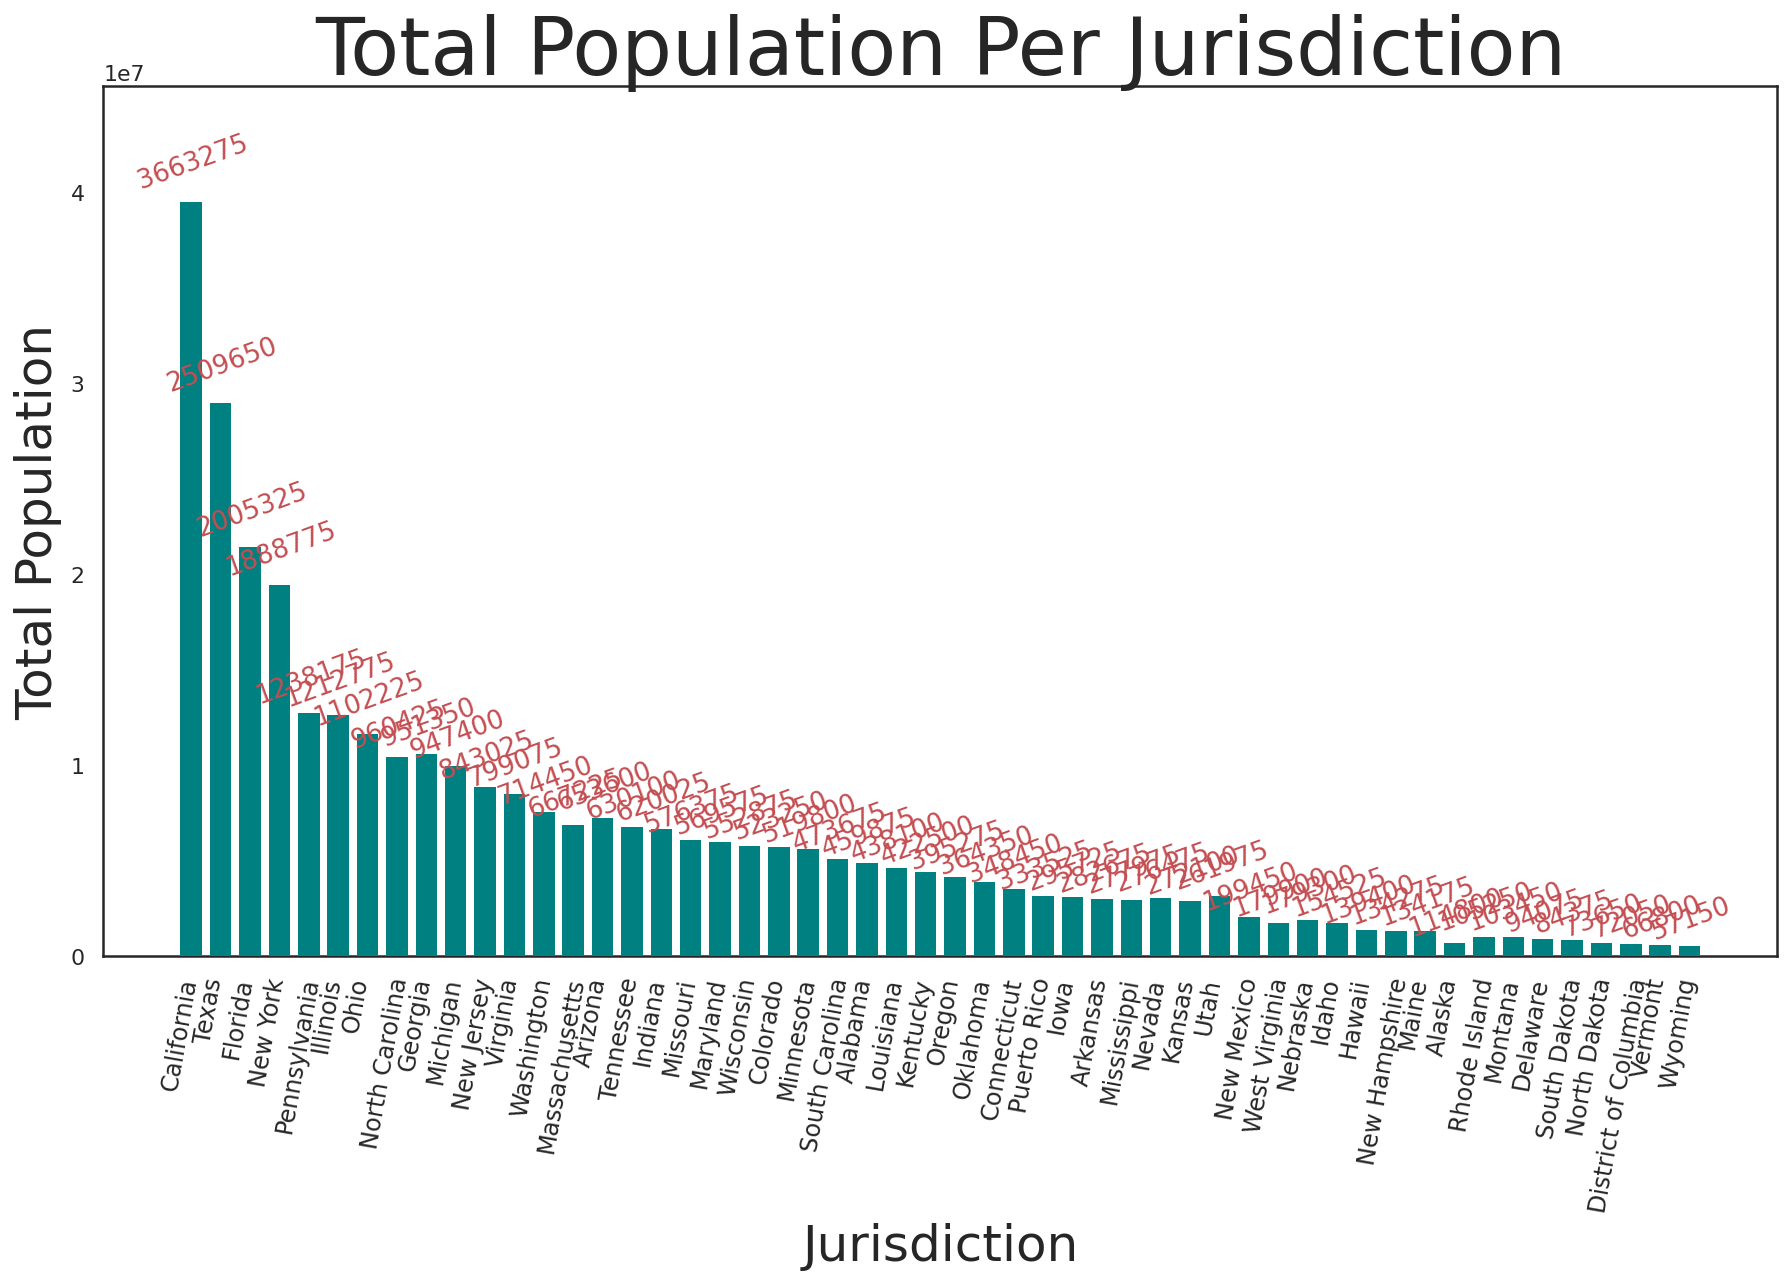

In [29]:
#https://matplotlib.org/examples/api/barchart_demo.html

N=state_pop_vac_sort.jurisdiction.count()

population=tuple(list(state_pop_vac_sort['2019_population']))
allocation=tuple(list(state_pop_vac_sort['total_first_allocation']))
jurisdiction=tuple(list(state_pop_vac_sort['jurisdiction']))

ind=np.arange(N)
width=0.8

fig,ax=plt.subplots(figsize=(15,8))
rects1=ax.bar(ind,population,width,color='teal')

ax.set_ylabel('Total Population',size=25)
ax.set_title('Total Population Per Jurisdiction',size=40)
ax.set_xlabel('Jurisdiction',size=25)
ax.set_xticks(ind-width/2)
ax.set_xticklabels(jurisdiction)

plt.xticks(size=12,rotation=80)
plt.ylim([0, 45512223])
# plt.ticklabel_format(style='plain',axis='y')

# attach a text label above each bar displaying each state's vaccine allocation
def autolabel(rects):
    n=-1
    for rect in rects:
        n+=1
        pop=rect.get_height() #getting the height of the text
        ax.text(rect.get_x()+rect.get_width()/2.+0.06,1.01*pop,
                '%d'%(allocation[n]),
                ha='center',va='bottom',color='r',fontsize=13,rotation=20)
        
autolabel(rects1)

plt.show()

---

**all the states with their total vaccine allocation, the text on each bar are allocation too**

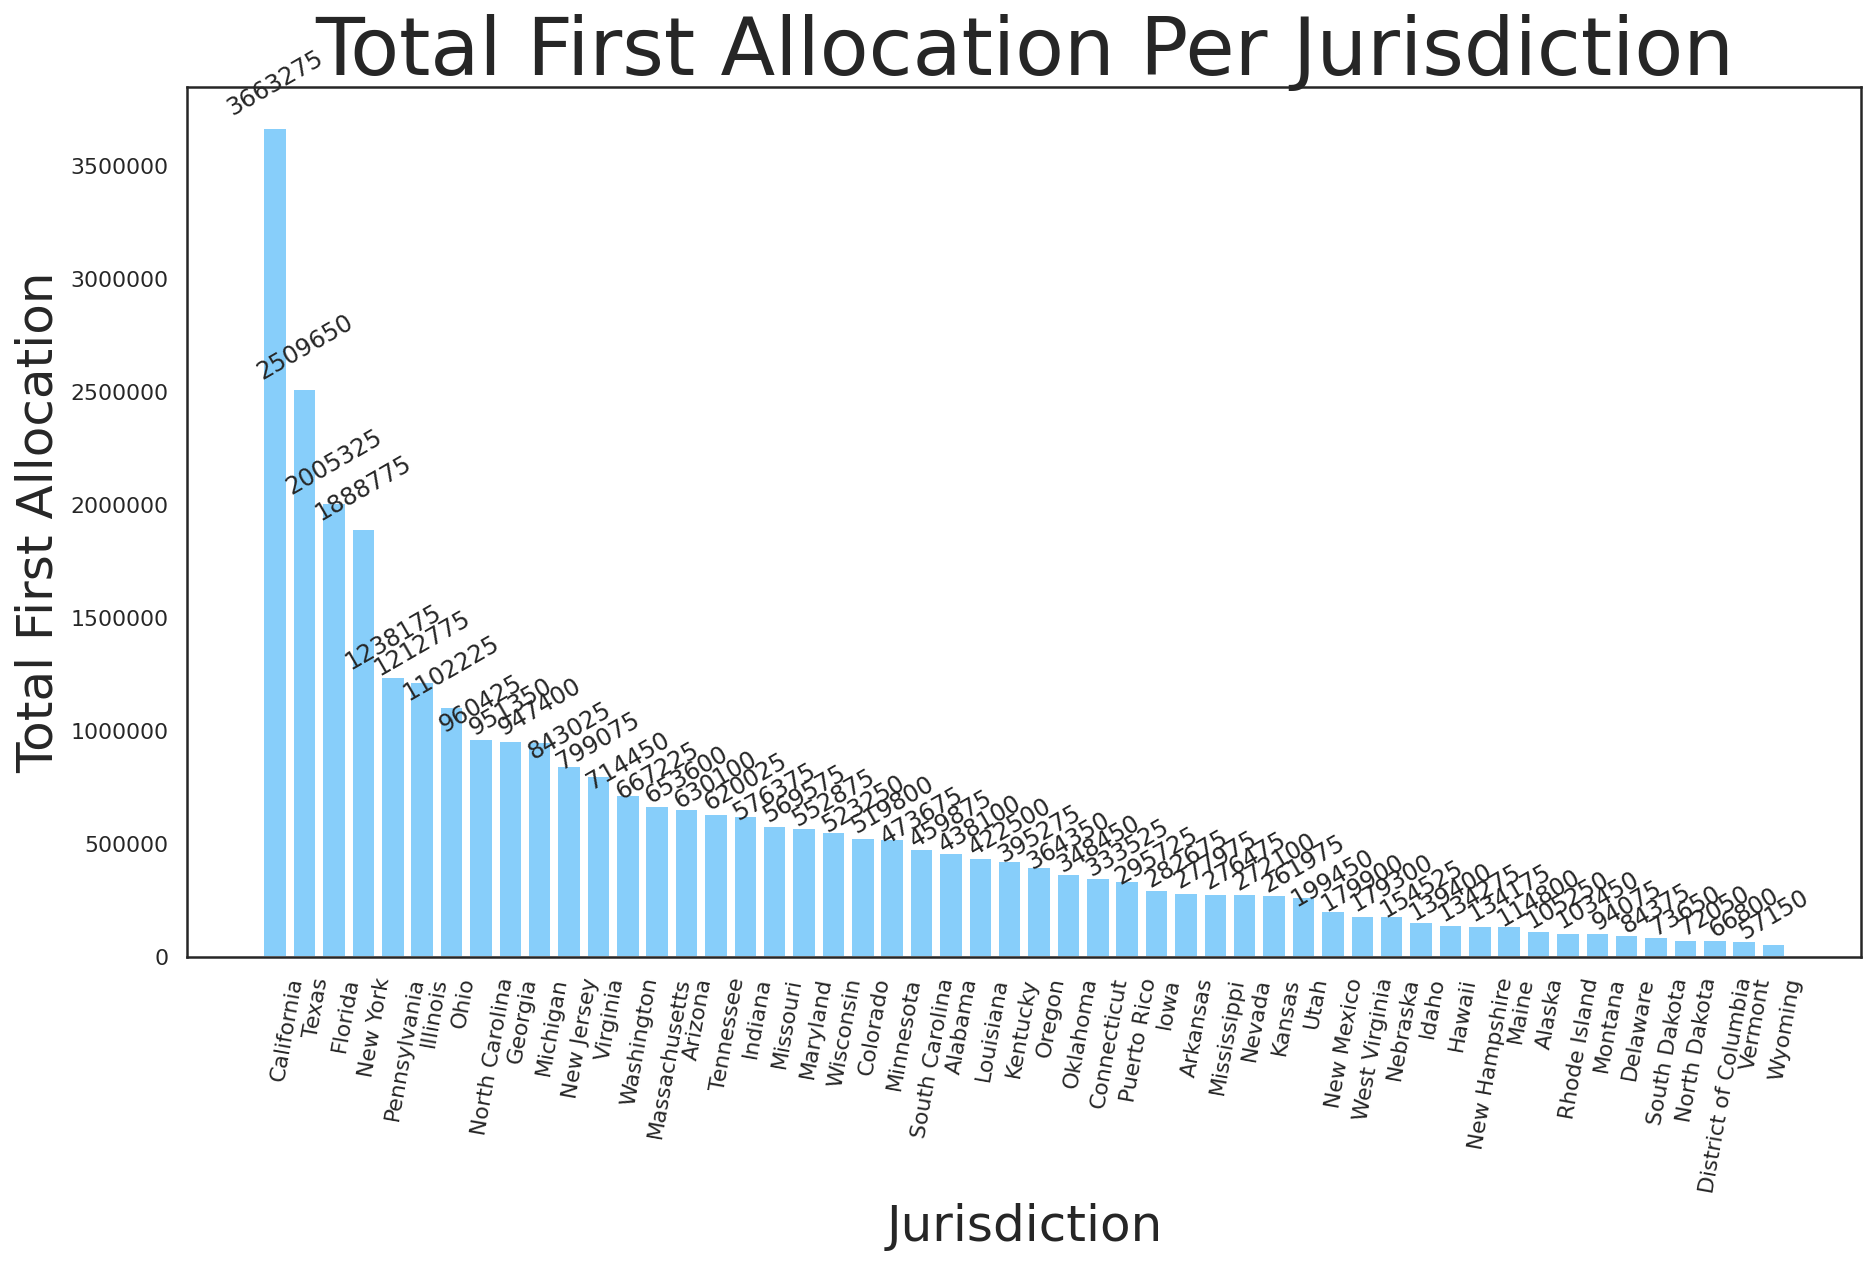

In [30]:
#https://matplotlib.org/examples/api/barchart_demo.html

N=state_pop_vac_sort.jurisdiction.count()
allocation=tuple(list(state_pop_vac_sort['total_first_allocation']))
jurisdiction=tuple(list(state_pop_vac_sort['jurisdiction']))

ind=np.arange(N)
width=0.8

fig,ax=plt.subplots(figsize=(15,8))
rects1=ax.bar(ind,allocation,width,color='#87CEFA')

ax.set_ylabel('Total First Allocation',size=25)
ax.set_title('Total First Allocation Per Jurisdiction',size=40)
ax.set_xlabel('Jurisdiction',size=25)
ax.set_xticks(ind+width/2)
ax.set_xticklabels(jurisdiction)

plt.xticks(rotation=80)
plt.ticklabel_format(style='plain',axis='y')

# attach a text label above each bar displaying its allocation
def autolabel(rects):
    for rect in rects:
        alloc=rect.get_height()#这一步是提取allocation的数字
        ax.text(rect.get_x()+rect.get_width()/2.,1.01*alloc,
               '%d'%int(alloc),ha='center',va='bottom',rotation=30)
autolabel(rects1)

plt.show()

In [31]:
state_pop_vac_sort_10=state_pop_vac_sort[:10].reset_index(drop=True)
state_pop_vac_sort_10.rename(columns={'2019_population':'population'},inplace=True)

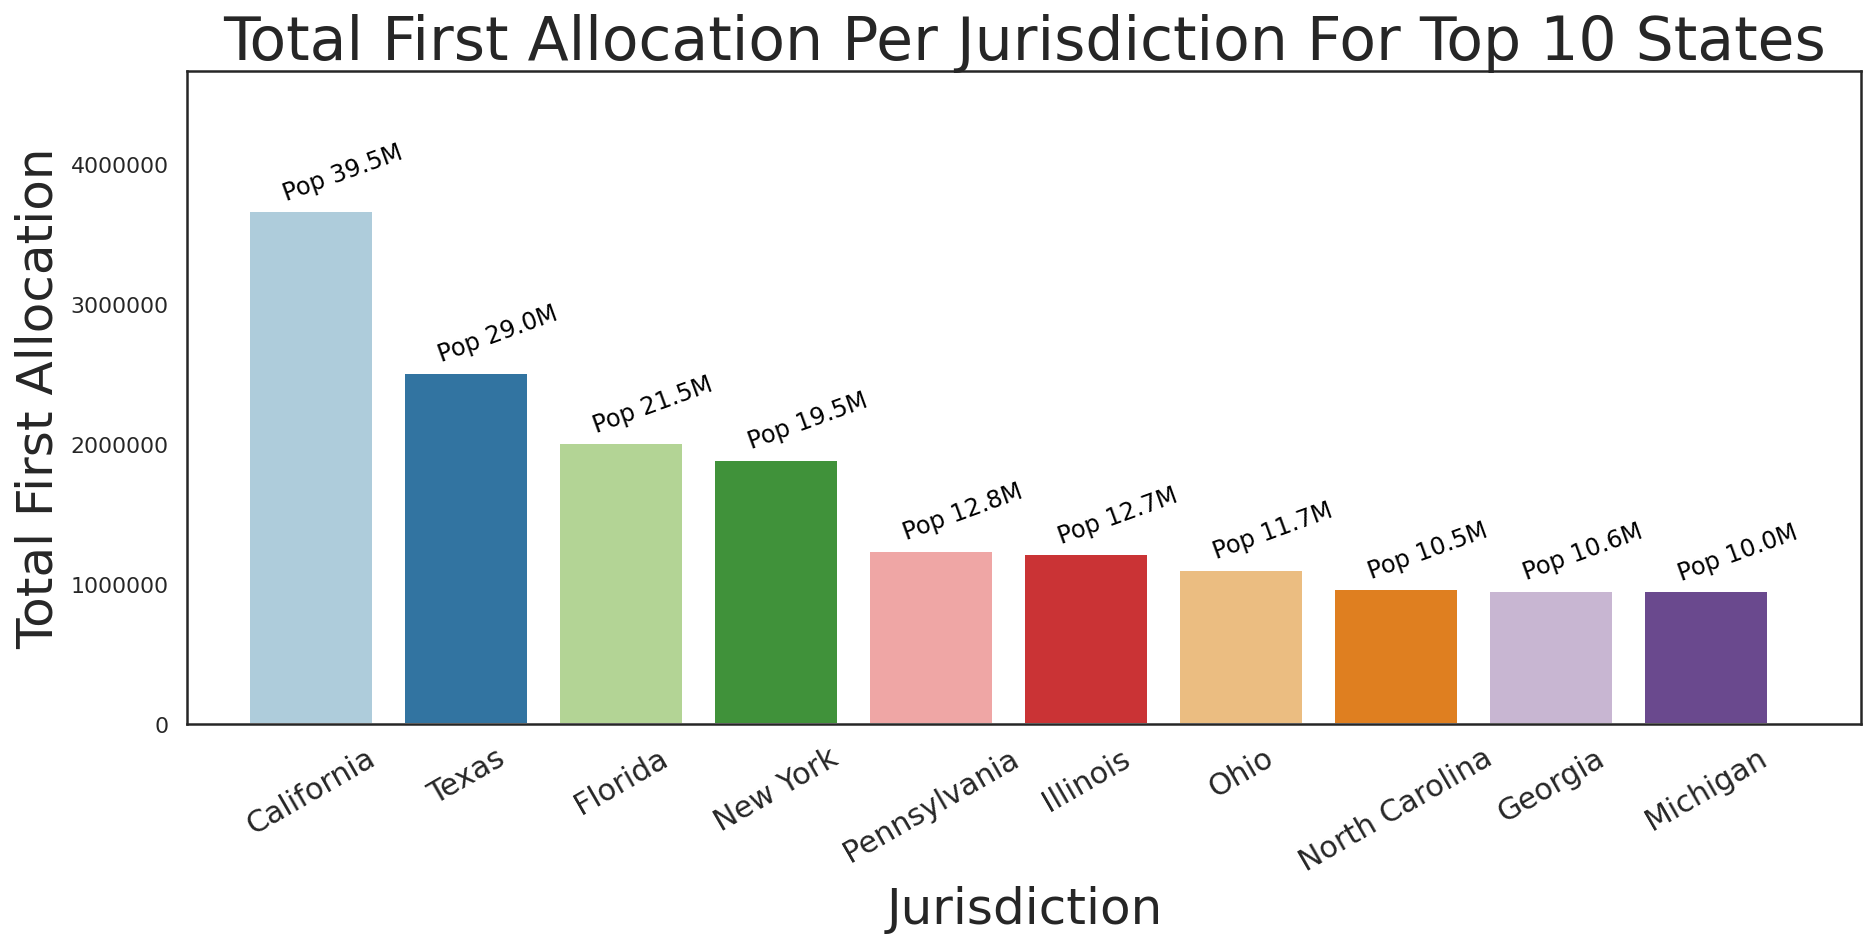

In [34]:
plt.figure(figsize=(15,6))

g=sns.barplot(data=state_pop_vac_sort_10,y=state_pop_vac_sort_10['total_first_allocation'],
              x=state_pop_vac_sort_10['jurisdiction'],palette='Paired')
#              linewidth=2.5, facecolor=(1, 1, 1, 0),
#                  errcolor=".2", edgecolor=".2")

plt.ticklabel_format(style='plain',axis='y')
plt.xlabel("Jurisdiction",size=25)
plt.ylabel("Total First Allocation",size=25)
plt.title('Total First Allocation Per Jurisdiction For Top 10 States',size=30)
plt.ylim([0,4663275])
plt.xlim([-0.8,10])
plt.xticks(rotation=30,size=15)


for index, row in state_pop_vac_sort_10.iterrows():
    g.text(row.name+0.2,row.total_first_allocation+80000,
           'Pop'' ''{0:.1f}M'.format(row.population/1000_000),
           color='black',ha='center',rotation=20)
plt.savefig('../images/first_allocation_top_10_states.png')